***

*Course:* [Math 535](https://people.math.wisc.edu/~roch/mmids/) - Mathematical Methods in Data Science (MMiDS)  
*Chapter:* 1-Introduction   
*Author:* [Sebastien Roch](https://people.math.wisc.edu/~roch/), Department of Mathematics, University of Wisconsin-Madison  
*Updated:* Jan 4, 2024   
*Copyright:* &copy; 2024 Sebastien Roch

***

In [1]:
# IF RUNNING ON GOOGLE COLAB, UNCOMMENT THE FOLLOWING CODE CELL
# When prompted, upload: 
#     * mmids.py
#     * penguins-measurements.csv
#     * penguins-species.csv
# from your local file system
# Files at: https://github.com/MMiDS-textbook/MMiDS-textbook.github.io/tree/main/utils
# Alternative instructions: https://colab.research.google.com/notebooks/io.ipynb

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [4]:
# PYTHON 3
import numpy as np
from numpy import linalg as LA
from numpy.random import default_rng
rng = default_rng(535)
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import mmids

## Motivating example: species delimitation

Here is a [penguin dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/). We will upload the data in the form of a data table (similar to a spreadsheet) called [`DataFrame`](https://pandas.pydata.org/docs/reference/frame.html) in [`pandas`](https://pandas.pydata.org/docs/), where the columns are different measurements (or features) and the rows are different samples. Below, we load the data using [`pandas.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv#) and show the first $5$ lines of the dataset (see [`DataFrame.head`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)). This dataset is a simplified version (i.e., with some columns removed) of the full dataset, maintained by [Allison Horst](https://allisonhorst.com/) at this [GitHub page](https://github.com/allisonhorst/palmerpenguins/blob/main/README.md). 

In [5]:
df = pd.read_csv('penguins-measurements.csv')
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


Observe that this dataset has missing values (i.e., the entries `NaN` above). A common way to deal with this issue is to remove all rows with missing values. This can be done using [`pandas.DataFrame.dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

In [6]:
df = df.dropna()
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


There are $342$ samples, as can be seen by using [`pandas.DataFrame.shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) which gives the dimensions of the DataFrame as a tuple.

In [7]:
df.shape[0]

342

Here is a summary of the data (see [`pandas.DataFrame.describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)).

In [8]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Let's first extract the columns into a Numpy array using [`pandas.DataFrame.to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html).

In [9]:
X = df[['bill_length_mm', 'bill_depth_mm', 
        'flipper_length_mm', 'body_mass_g']].to_numpy()
print(X)

[[  39.1   18.7  181.  3750. ]
 [  39.5   17.4  186.  3800. ]
 [  40.3   18.   195.  3250. ]
 ...
 [  50.4   15.7  222.  5750. ]
 [  45.2   14.8  212.  5200. ]
 [  49.9   16.1  213.  5400. ]]


We visualize two measurements in the data, the bill depth and flipper length. (The original dataset used the more precise term [culmen](https://en.wikipedia.org/wiki/Beak#Culmen) depth.) Below, each point is a sample. This is called a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). 

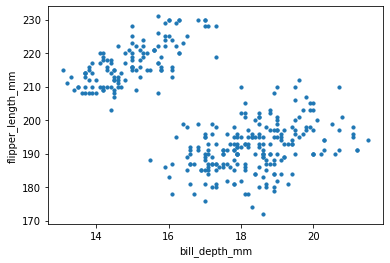

In [10]:
plt.scatter(X[:,1], X[:,2], s=10)
plt.xlabel('bill_depth_mm')
plt.ylabel('flipper_length_mm')
plt.show()

Now let's look at the full dataset. Visualizing the full $4$-dimensional data is not straightforward. One way to do this is to consider all pairwise scatter plots. We use the function [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) from the library [Seaborn](https://seaborn.pydata.org/index.html). 

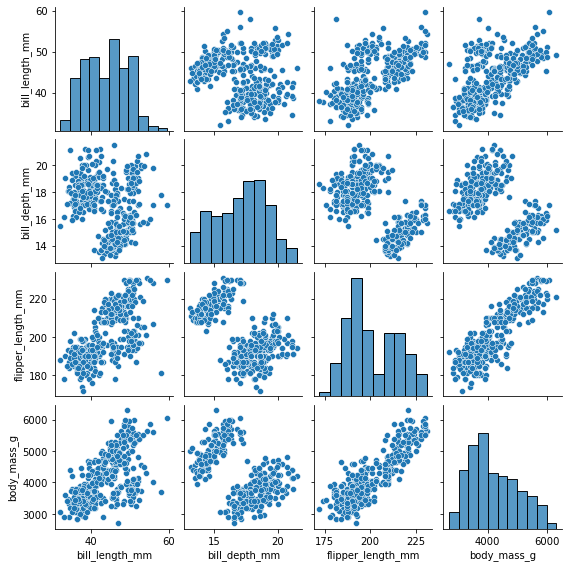

In [11]:
import seaborn as sns
sns.pairplot(df, vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], height=2)
plt.show()

## Background: review of basic linear algebra, calculus, and probability

**NUMERICAL CORNER:** In Numpy, a vector is defined as a 1d array. We first must import the [Numpy](https://numpy.org) package, which is often abbreviated by `np`.

In [3]:
import numpy as np
u = np.array([1., 3., 5. ,7.])
print(u)

[1. 3. 5. 7.]


To obtain the norm of a vector, we can use the function [`linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) (which requires the `numpy.linalg` package):

In [4]:
from numpy import linalg as LA
LA.norm(u)

9.16515138991168

which we check next "by hand"

In [5]:
np.sqrt(np.sum(u ** 2))

9.16515138991168

In Numpy, [`**`](https://numpy.org/doc/stable/reference/generated/numpy.power.html) indicates element-wise exponentiation.

**NUMERICAL CORNER:** We will often work with collections of $n$ vectors $\mathbf{x}_1, \ldots, \mathbf{x}_n$ in $\mathbb{R}^d$ and it will be convenient to stack them up into a matrix

$$
X =
\begin{bmatrix}
\mathbf{x}_1^T \\
\mathbf{x}_2^T \\
\vdots \\
\mathbf{x}_n^T \\
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1d} \\
x_{21} & x_{22} & \cdots & x_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nd} \\
\end{bmatrix}.
$$

To create a matrix out of two vectors, we use the function [`numpy.stack`](https://numpy.org/doc/stable/reference/generated/numpy.stack.html).

In [6]:
u = np.array([1., 3., 5., 7.])
v = np.array([2., 4., 6., 8.])
X = np.stack((u,v),axis=0)
print(X)

[[1. 3. 5. 7.]
 [2. 4. 6. 8.]]


Quoting the documentation:

> The axis parameter specifies the index of the new axis in the dimensions of the result. For example, if axis=0 it will be the first dimension and if axis=-1 it will be the last dimension.

The same scheme still works with more than two vectors.

In [7]:
u = np.array([1., 3., 5., 7.])
v = np.array([2., 4., 6., 8.])
w = np.array([9., 8., 7., 6.])
X = np.stack((u,v,w))
print(X)

[[1. 3. 5. 7.]
 [2. 4. 6. 8.]
 [9. 8. 7. 6.]]


**NUMERICAL CORNER:** In Numpy, the Frobenius norm of a matrix can be computed using the function [`numpy.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

In [8]:
A = np.array([[1., 0.],[0., 1.],[0., 0.]])
print(A)

[[1. 0.]
 [0. 1.]
 [0. 0.]]


In [9]:
LA.norm(A)

1.4142135623730951

**NUMERICAL CORNER:** The function $f(x) = x^2$ over $\mathbb{R}$ has a global minimizer at $x^* = 0$. Indeed, we clearly have $f(x) \geq 0$ for all $x$ while $f(0) = 0$. To plot the function, we use the [matplotlib](https://matplotlib.org) package, and specifically its function [`matplotlib.pyplot.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). We also use the function [`numpy.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to create an array of evenly spaced numbers where we evaluate $f$.

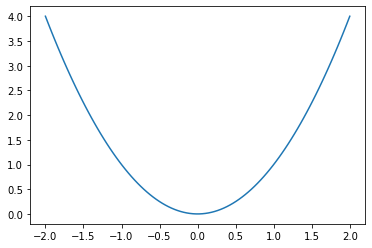

In [10]:
import matplotlib.pyplot as plt
x = np.linspace(-2,2,100)
y = x ** 2
plt.plot(x,y)
plt.show()

The function $f(x) = e^x$ over $\mathbb{R}$ does not have a global minimizer. Indeed, $f(x) > 0$ but no $x$ achieves $0$. And, for any $m > 0$, there is $x$ small enough such that $f(x) < m$. Note that $\mathbb{R}$ is *not* bounded, therefore the *Extreme Value Theorem* does not apply here.

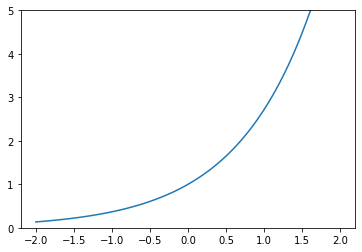

In [11]:
x = np.linspace(-2,2,100)
y = np.exp(x)
plt.plot(x,y)
plt.ylim(0,5)
plt.show()

The function $f(x) = (x+1)^2 (x-1)^2$ over $\mathbb{R}$ has two global minimizers at $x^* = -1$ and $x^{**} = 1$. Indeed, $f(x) \geq 0$ and $f(x) = 0$ if and only $x = x^*$ or $x = x^{**}$.

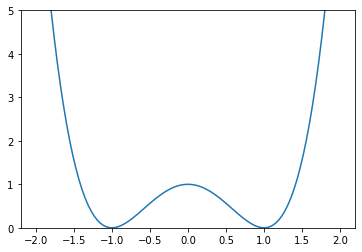

In [12]:
x = np.linspace(-2,2,100)
y = ((x+1)**2) * ((x-1)**2)
plt.plot(x,y)
plt.ylim(0,5)
plt.show()

**NUMERICAL CORNER:** We can use simulations to confirm the *Weak Law of Large Numbers*. Recall that a uniform random variable over the interval $[a,b]$ has density

$$
f_{X}(x)
= \begin{cases}
\frac{1}{b-a} & x \in [a,b] \\
0 & \text{o.w.}
\end{cases}
$$

We write $X \sim \mathrm{U}[a,b]$. We can obtain a sample from $\mathrm{U}[0,1]$ by using the function [`numpy.random`](https://numpy.org/doc/stable/reference/random/generator.html) in Numpy.  

In [13]:
from numpy.random import default_rng
rng = default_rng(535)
rng.random()

0.9836159914889122

Now we take $n$ samples from $\mathrm{U}[0,1]$ and compute their sample mean. We repeat $k$ times and display the empirical distribution of the sample means using an [histogram](https://en.wikipedia.org/wiki/Histogram).

In [14]:
def lln_unif(n, k):
    sample_mean = [np.mean(rng.random(n)) for i in range(k)]
    plt.hist(sample_mean,bins=15)
    plt.xlim(0,1)
    plt.title(f'n={n}')
    plt.show()

We start with $n=10$.

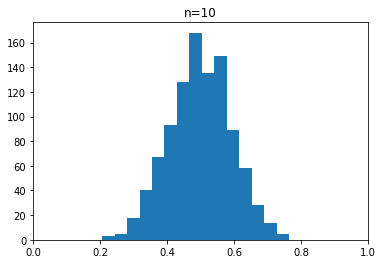

In [15]:
lln_unif(10, 1000)

Taking $n$ much larger leads to more concentration around the mean.

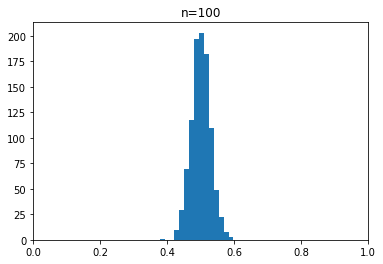

In [16]:
lln_unif(100, 1000)

**NUMERICAL CORNER:** We plot the PDF of a standard normal distribution. We use the function [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) from the [SciPy library](https://scipy.org), which outputs the PDF. The following code was adapted from [here](https://commons.wikimedia.org/wiki/File:Standard_Normal_Distribution.svg) with the help of ChatGPT.

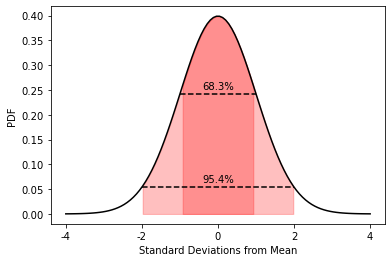

In [17]:
from scipy.stats import norm

# Plot the normal distribution curve
x = np.linspace(-4, 4, 100)
y = norm.pdf(x)
plt.plot(x, y, color='black')

# Fill areas under the curve for different standard deviations
plt.fill_between(x, y, where=(x > -1) & (x < 1), color='red', alpha=0.25)
plt.fill_between(x, y, where=(x > -2) & (x < 2), color='red', alpha=0.25)
plt.hlines(norm.pdf(1), -1, 1, color='black', linestyle='dashed')
plt.hlines(norm.pdf(2), -2, 2, color='black', linestyle='dashed')
plt.text(0, norm.pdf(1) + 0.01, "68.3%", ha='center')
plt.text(0, norm.pdf(2) + 0.01, "95.4%", ha='center')

# Set labels, title, and xticks
plt.xlabel("Standard Deviations from Mean")
plt.ylabel("PDF")
plt.xticks(range(-4, 5, 2), [f'{i}' for i in range(-4, 5, 2)])
plt.show()

**NUMERICAL CORNER:** The following function generates $n$ data points from a spherical $d$-dimensional Gaussians with variance $1$ and mean $w \mathbf{e}_1$. We will use it later in the chapter to simulate interesting datasets. 

Below, `rng.normal(0,1,d)` generates a `d`-dimensional spherical Gaussian with mean $\mathbf{0}$. Below we use the function [`numpy.concatenate`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) to create a vector by concatenating two given vectors. We use `[w]` to create a vector with a single entry `w`. We also use the function [`numpy.zeros`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) to create an all-zero vector. 

In [18]:
def one_cluster(d, n, w):
    X = np.stack(
        [np.concatenate(([w], np.zeros(d-1))) + rng.normal(0,1,d) for _ in range(n)]
    )
    return X

We generate $100$ data points in dimension $d=2$.

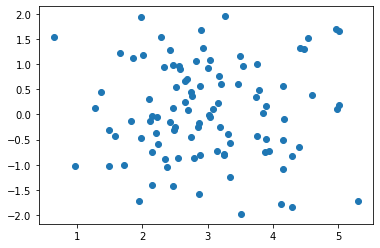

In [19]:
d, n, w = 2, 100, 3.
X = one_cluster(d, n, w)
plt.scatter(X[:,0], X[:,1])
plt.show()

## Clustering: an objective, an algorithm and a guarantee

**NUMERICAL CORNER:** Here's a numerical example. We first define a quadratic function.

In [5]:
def q(a,b,c,x):
    return a * (x**2) + b * x + c

We plot it for different values of the coefficients. 

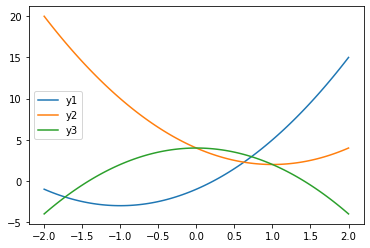

In [6]:
x = np.linspace(-2, 2, 100)

plt.plot(x, q(2,4,-1,x))
plt.plot(x, q(2,-4,4,x))
plt.plot(x, q(-2,0,4,x))

plt.legend(['y1', 'y2', 'y3'])

plt.show()

We are now ready to describe the <a href="https://en.wikipedia.org/wiki/K-means_clustering">$k$-means algorithm</a>, also known as Lloyd's algorithm. We start from a random assignment of clusters. (An alternative [initialization strategy](https://en.wikipedia.org/wiki/K-means_clustering#Initialization_methods) is to choose $k$ representatives at random among the data points.) We then alternate between the optimal choices in the lemmas. In lieu of pseudo-code, we write out the algorithm in Python. 

The input `X` is assumed to be a collection of $n$ vectors $\mathbf{x}_1, \ldots, \mathbf{x}_n \in \mathbb{R}^d$ stacked into a matrix, with one row for each data point. The other input, `k`, is the desired number of clusters. There is an optional input `maxiter` for the maximum number of iterations, which is set to $10$ by default.

We first define separate functions for the two main steps. To find the minimum of an array, we use the function [`numpy.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html). We also use [`numpy.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) to compute the Euclidean distance.

In [7]:
def opt_reps(X, k, assign):
    (n, d) = X.shape
    reps = np.zeros((k, d))
    for i in range(k):
        in_i = [j for j in range(n) if assign[j] == i]             
        reps[i,:] = np.sum(X[in_i,:],axis=0) / len(in_i)
    return reps

def opt_clust(X, k, reps):
    (n, d) = X.shape
    dist = np.zeros(n)
    assign = np.zeros(n, dtype=int)
    for j in range(n):
        dist_to_i = np.array([LA.norm(X[j,:] - reps[i,:]) for i in range(k)])
        assign[j] = np.argmin(dist_to_i)
        dist[j] = dist_to_i[assign[j]]
    G = np.sum(dist ** 2)
    print(G)
    return assign

The main function follows. Below, `rng.integers(0,k,n)` is an array of `n` uniformly chosen integers between `0` and `k-1` (inclusive). (See [random.Generator.integers](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html) for details.)

In [8]:
def kmeans(X, k, maxiter=10):
    (n, d) = X.shape
    assign = rng.integers(0,k,n)
    reps = np.zeros((k, d), dtype=int)
    for iter in range(maxiter):
        # Step 1: Optimal representatives for fixed clusters
        reps = opt_reps(X, k, assign) 
        # Step 2: Optimal clusters for fixed representatives
        assign = opt_clust(X, k, reps) 
    return assign

**NUMERICAL CORNER:** We apply our implementation of $k$-means to the example above. We fix `k` to $3$. Here the data matrix `X` is the following:

In [9]:
X = np.array([[1., 0.],[-2., 0.],[-2.,1.],[1.,-3.],[-10.,10.],[2.,-2.],[-3.,1.],[3.,-1.]])
assign = kmeans(X, 3)

162.7
74.8611111111111
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334


We vizualize the output by coloring the points according to their cluster assignment.

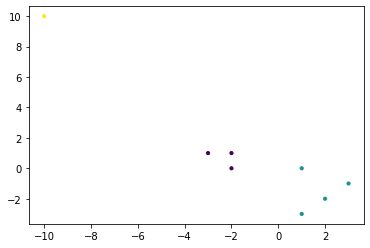

In [10]:
plt.scatter(X[:,0], X[:,1], c=assign, s=10)
plt.show()

We can compute the final representatives (optimal for the final assignment) by using the subroutine `opt_reps`.

In [11]:
print(opt_reps(X, 3, assign))

[[ -2.33333333   0.66666667]
 [  1.75        -1.5       ]
 [-10.          10.        ]]


Each row is the center of the corresponding cluster. Note these match with the ones we previously computed. Indeed, the clustering is the same (although not necessarily in the same order).

We will test our implementation of $k$-means on the penguins dataset introduced earlier in the chapter.

We first extract the columns and combine them into a data matrix `X`. As we did previously, we also remove the rows with missing values.

In [12]:
df = pd.read_csv('penguins-measurements.csv')
df = df.dropna()
X = df[['bill_length_mm', 'bill_depth_mm', 
        'flipper_length_mm', 'body_mass_g']].to_numpy()

We  visualize a two-dimensional slice of the data. 

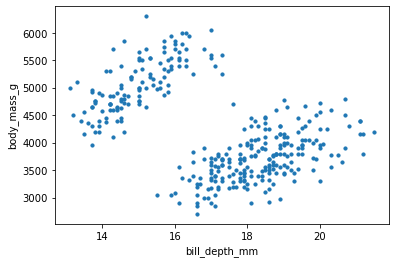

In [13]:
plt.scatter(X[:,1], X[:,3], s=10)
plt.xlabel('bill_depth_mm')
plt.ylabel('body_mass_g')
plt.show()

Observe that the features have quite different scales (tens versus thousands in the plot above). In such a case, it is common to standardize the data so that each feature has roughly the same scale. That is accomplished by, for each column of `X`, subtracting its empirical mean and dividing by its empirical standard deviation. We do this next. 

In [14]:
mean = np.mean(X, axis=0)  # Compute mean for each column
std = np.std(X, axis=0)  # Compute standard deviation for each column
X = (X - mean) / std # Standardize each column

Now we run the $k$-means algorithm with $k=2$ clusters. 

In [15]:
assign = kmeans(X, 2)

1338.2046936914157
820.9361062178352
603.8787658966849
575.2587351391593
567.7837494880662
565.7076453796291
565.7076453796291
565.7076453796291
565.7076453796291
565.7076453796291


We vizualize the output as we did before.

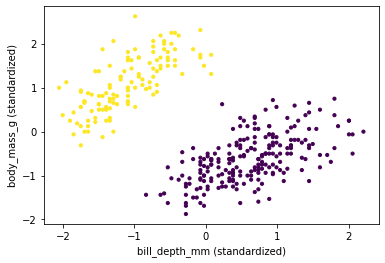

In [16]:
plt.scatter(X[:,1], X[:,3], c=assign, s=10)
plt.xlabel('bill_depth_mm (standardized)')
plt.ylabel('body_mass_g (standardized)')
plt.show()

This clustering looks quite good. Nevertheless recall that:

1. in this plot we are looking at only two of the four variables while $k$-means uses all of them, 

2. we are not guaranteed to find the best solution, 

3. our objective function is somewhat arbitrary, and 

4. it is not clear what the right choice of $k$ is. 

In fact, the original dataset provided the correct answer. Despite what the figure above may lead us to believe, there are in reality three separate species. So let's try with $k=3$ clusters.

In [17]:
assign = kmeans(X, 3)

1312.344945158482
577.1700837839458
428.50397345437966
392.2616692426171
383.3452894259011
380.76115947528945
379.50930154236835
379.3925027555175
379.3925027555175
379.3925027555175


The output does not seem quite right.

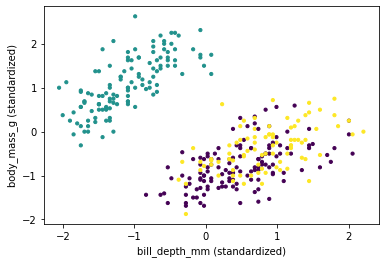

In [18]:
plt.scatter(X[:,1], X[:,3], c=assign, s=10)
plt.xlabel('bill_depth_mm (standardized)')
plt.ylabel('body_mass_g (standardized)')
plt.show()

But, remembering the warnings mentioned previously, let's look at a different two-dimensional slice.

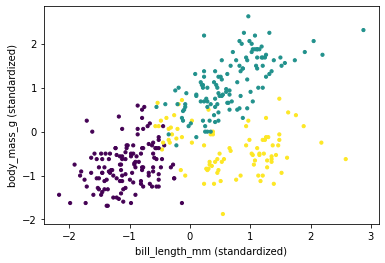

In [19]:
plt.scatter(X[:,0], X[:,3], c=assign, s=10)
plt.xlabel('bill_length_mm (standardized)')
plt.ylabel('body_mass_g (standardized)')
plt.show()

Let's load up the truth and compare. We only keep those samples that were not removed because of missing values (see [`pandas.DataFrame.iloc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)).

In [20]:
df_truth = pd.read_csv('penguins-species.csv') 
df_truth = df_truth.iloc[df.index]
df_truth.head()

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie


The species are:

In [21]:
species = df_truth['species']
print(species.unique())

['Adelie' 'Chinstrap' 'Gentoo']


To plot the outcome, we color the species blue-green-red using a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries).

In [22]:
species2color = {'Adelie': 'b', 'Chinstrap': 'g', 'Gentoo': 'r'}
truth = species.replace(species2color)

Finally, we can compare the output to the truth. The match is quite excellent -- but not perfect.

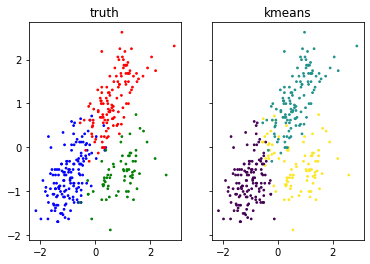

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.scatter(X[:,0], X[:,3], c=truth, s=3)
ax1.set_title('truth')
ax2.scatter(X[:,0], X[:,3], c=assign, s=3)
ax2.set_title('kmeans')
plt.show()

**TRY IT!** Run the analysis again, but this time *without the standardization step*. What do you observe? Is one feature more influential than the others on the final output? Why do you think that is?